# TP 5 Réseaux de neurones - Multi classification et Propagation en avant
Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.




# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

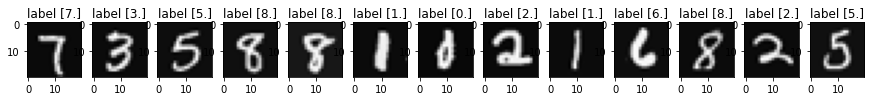

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1, régression logistique
Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous.

Nous paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre decaractéristiques (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.

In [6]:
 #Premierement : Sigmoid function  
 # sachant que z= teta.T *X
def sigmoid(z):
    
    return 1/ (1 + np.exp(-z))

In [22]:

def lrCostFunction (X, y, theta, alpha, MaxIter,lambda_):
    m=X.shape[0]
    b=theta[0]
    w=theta[1:]
    #cost =[]
    for i in range(MaxIter):
        y_pred= sigmoid( X.dot(theta))  
        reg=(lambda_/m)* w
        db=1/m * np.dot(X.T[0,:],(y_pred-y))
        dw= 1/m * np.dot(X.T[1:,:],(y_pred-y))+reg 
        b=b- (alpha*(db))
        w=w- (alpha*(dw))
        theta=np.vstack((b,w))
        
    return theta


In [8]:
def predictOneVsAll (all_theta, X):
    m=X.shape[0]
    
    z= np.dot(X,all_theta.T)
    pred= sigmoid(z)
    y_pred= np.argmax(pred,axis=1)#retourner la prediction
    
    return y_pred

In [32]:
classes= np.unique(y)
number_classes=classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]));
classes

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [46]:
MaxIter= 1000
lambda_= 0.1
alpha = 0.01
# initial_theta pour chaque classifieur
initial_theta=np.zeros((X.shape[1], 1));
for i in range (number_classes):
     # appel pour chaque classifieur
    theta = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,lambda_);
    all_theta[i,:]=theta.T;   
    
all_theta.shape

(10, 401)

In [51]:
y_pred = predictOneVsAll(all_theta, X);


# Qualité du classifieur RL

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [52]:
y_test=np.where(y == 0, 10,y)
precision = np.mean(y_pred==y_test.T)*100
precision


74.6

# Partie 2: Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [26]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [27]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [28]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [29]:
def predict (W1, W2, X):
    m= X.shape[0]    
    #couche 1 est les x
    c1 = sigmoid(np.dot(X , W1.T))#couche 2
    c2 = np.hstack((np.ones((m,1)), c1)) 
    c21 = sigmoid(np.dot(c2 , W2.T))#couche3 sortie
    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie
    y_pred=np.argmax(c21,axis=1)+1
    return y_pred

In [53]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(W1, W2,X)
#le 10 etait remplacé par etiq 0
#donc on doit remettre le Y comme il etait
#c'est a dire 10 a la place du 0 pour avoir le maximum de resultats
y_test=np.where(y == 0, 10,y)

#Calcul de la precision
precision = np.mean(y_test.T==y_pred)*100

precision


97.52

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [72]:
#LOGISTIC REGRESSION
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.30, random_state = 0)

logReg = LogisticRegression(max_iter=1000)
logReg.fit(x_train, y_train)
print(logReg.score(x_test, y_test))

#Neural Network
from sklearn.neural_network import MLPClassifier
neuralN = MLPClassifier(hidden_layer_sizes=hidden_layer_size,activation='logistic',max_iter=1000)
neuralN.fit(x_train, y_train)
print (neuralN.score(x_test, y_test))


C:\Users\User-hst\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9826666666666667


C:\Users\User-hst\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.962


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

#### Pour la regression logistique:
    - varier le learning rate, varier le lambda pour la regularisation, augmenter le nombre d'iterations
####  Pour le reseaux de neurones:
    - modifier les couches ou peut etre ajouter d'autre couches ( ce qui implique des calculs de nouveaux thetas)

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 22 Avril 2022 à 22h


In [ ]:
# bonne chance